In [1]:
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

2024-02-21 08:39:32.452203: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 08:39:32.452344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 08:39:32.645446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Visualize dataset

In [2]:
import os

data_dir = "/kaggle/input/100-bird-species" 

class_dirs = os.listdir(os.path.join(data_dir, "train"))
num_species = len(class_dirs)
print("Number of species:", num_species)

Number of species: 525


In [3]:
from pathlib import Path
image_dir = Path(data_dir)

filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [4]:
train_dir = '/kaggle/input/100-bird-species/train'
training_info = {}
for class_name in os.listdir(train_dir):
    cpath = os.path.join(train_dir, class_name)
    training_info[class_name] = len(os.listdir(cpath))

In [5]:
top_species = sorted(training_info, key=training_info.get, reverse=True)[:5]
for i in top_species:
    print(i, training_info[i])

RUFOUS TREPE 263
HOUSE FINCH 248
OVENBIRD 233
D-ARNAUDS BARBET 233
ASIAN GREEN BEE EATER 220


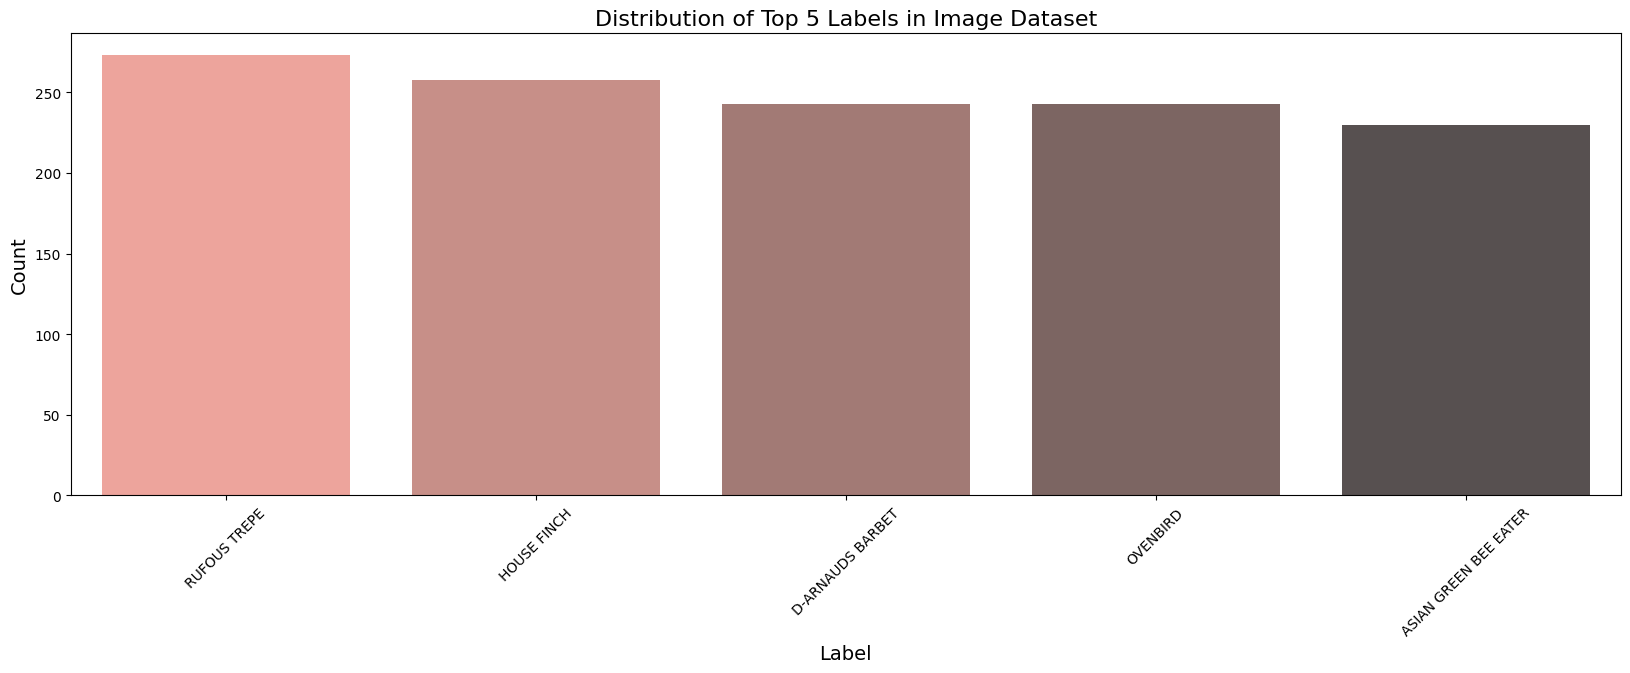

In [6]:
label_counts = image_df['Label'].value_counts()[:5]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Distribution of Top 5 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

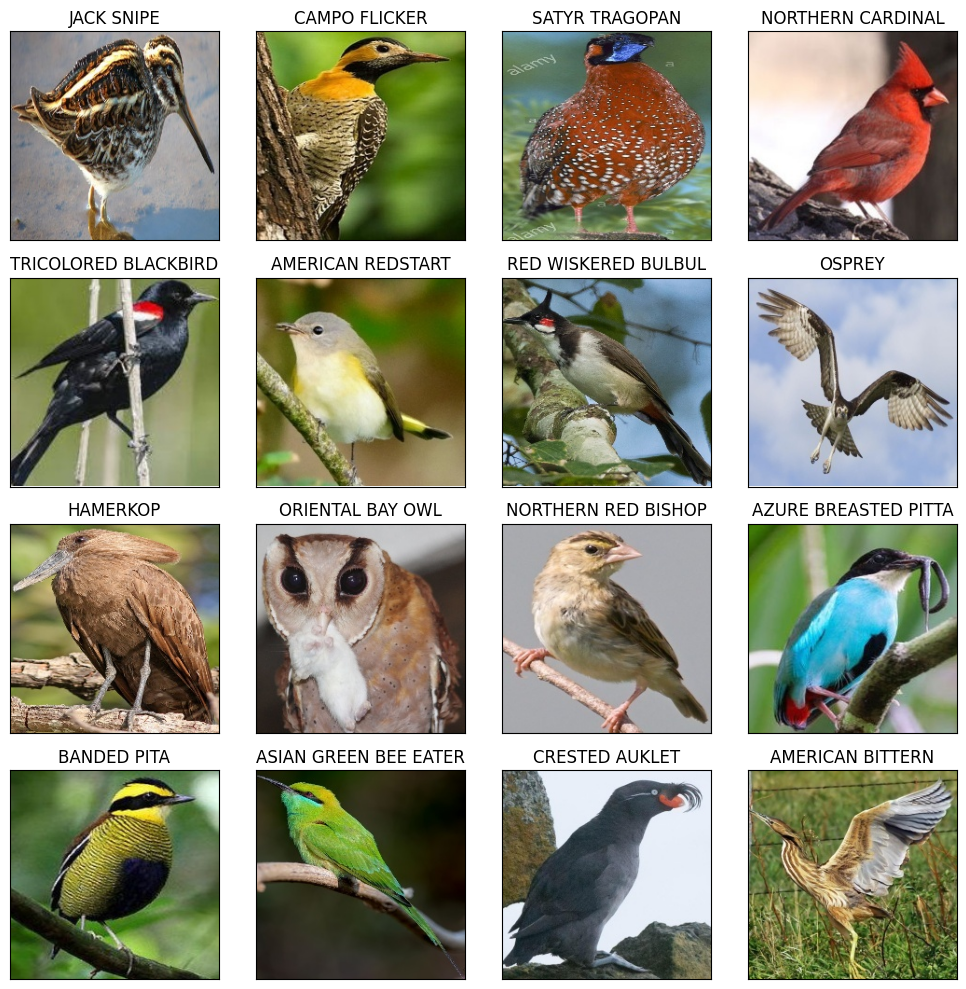

In [7]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# Preporcessing dataset

In [8]:
train_data, test_data = train_test_split(image_df, test_size=0.2)

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [10]:
train_data = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (225, 225),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

valid_data = train_datagen.flow_from_dataframe(
    dataframe = image_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (225, 225),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 57527 validated image filenames belonging to 526 classes.
Found 17977 validated image filenames belonging to 526 classes.
